<a href="https://colab.research.google.com/github/Olubusolami-R/gaussian-processes-cw/blob/main/2526/cw1/coursework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Ensure correct environment for GPy
import numpy, os, signal
if numpy.__version__ != "1.26.4":
    # 1. Uninstall conflicting packages
    !pip uninstall -y jax scipy jaxlib paramz pytensor > /dev/null 2>&1
    # 2. Install the versions required for GPy
    !pip install --force-reinstall numpy==1.26.4 scipy GPy paramz > /dev/null 2>&1
    # 3. Restart runtime to load correct NumPy ABI
    os.kill(os.getpid(), signal.SIGKILL)

!wget -q https://mlg.eng.cam.ac.uk/teaching/4f13/2526/cw/cw1a.mat > /dev/null
!wget -q https://mlg.eng.cam.ac.uk/teaching/4f13/2526/cw/cw1e.mat > /dev/null
!wget -q https://raw.githubusercontent.com/cambridge-mlg/4f13-courseworks/refs/heads/main/2526/cw1/gp.py > /dev/null

In [2]:
import GPy
import numpy as np
import gp as cw1utils

In [3]:
### Arbitrary data, X and y
X = np.random.rand(20, 1) * 10  # 20 data points in 1D
y = np.sin(X) + (np.cos(X))**2 + np.random.randn(20, 1) * 0.5  # noisy opipbservations

## Loading Matlab arrays in Python

In [4]:
import scipy.io as sio

In [5]:

data = sio.loadmat("cw1a.mat")  # Note this will throw an error because the file does not exist!

X = np.asarray(data["x"], dtype=float)
y = np.asarray(data["y"], dtype=float)

## GP Model Definition with Various Kernels (using GPy):

### Single kernels

Squared exponential (SE) isotropic

In [6]:
k = GPy.kern.RBF(input_dim=X.shape[1], lengthscale=1.0, variance=1.0)
m = GPy.models.GPRegression(X, y, k)
m.likelihood.variance = 1.0  # Note that this is the default value, so we don't strictly need to set it here unless we want a different initial value.

Periodic

In [7]:
k = GPy.kern.StdPeriodic(input_dim=X.shape[1], lengthscale=1.0, period=1.0, variance=1.0)
m = GPy.models.GPRegression(X, y, k)

SE Automatic Relevance Determination (ARD)

In [8]:
k = GPy.kern.RBF(input_dim=X.shape[1], ARD=True, lengthscale=1.0, variance=1.0)
m = GPy.models.GPRegression(X, y, k)

### Combined kernels

Product of Periodic and SE Isotropic

In [9]:
k_per = GPy.kern.StdPeriodic(input_dim=X.shape[1], lengthscale=1.0, period=1.0, variance=1.0)
k_se  = GPy.kern.RBF(input_dim=X.shape[1], lengthscale=1.0, variance=1.0)
kernel = k_per * k_se
m = GPy.models.GPRegression(X, y, kernel)

Sum of two SE ARD Kernels

In [10]:
z = np.random.randn(4)
ell1 = np.exp(z[0])
sf1  = np.exp(z[1])
var1 = sf1**2

ell2 = np.exp(z[2])
sf2  = np.exp(z[3])
var2 = sf2**2

k1 = GPy.kern.RBF(input_dim=X.shape[1], ARD=True, lengthscale=ell1, variance=var1)
k2 = GPy.kern.RBF(input_dim=X.shape[1], ARD=True, lengthscale=ell2, variance=var2)
k  = k1 + k2

m = GPy.models.GPRegression(X, y, kernel=k)

## GP Model Hyperparameter Optimisation using Marginal Likelihood

Once a GP regression model is specified, we can optimise its hyperparameters by minimising the negative log marginal likelihood (which is equivalent to maximising the likelihood of the data under the model.)

In [11]:
m.optimize(optimizer='lbfgsb', max_iters=2000, messages=False)

## Utilities functions useful for producing figures to be included in report

MODEL SUMMARY
NEGATIVE LOG MARGINAL LIKELIHOOD: 10.4955
OPTIMISED HYPERPARAMETERS:
    Component 1:
      • lengthscale (ℓ): 8616.09
      • signal std (σ_f): 0.466725
    Component 2:
      • lengthscale (ℓ): 0.119464
      • signal std (σ_f): 0.771632
    Noise std (σ_n): 0.117676
LML: -10.495453
  • Data fit term: -37.500078
  • Complexity penalty: -95.925015
  • Constant term: -68.920390


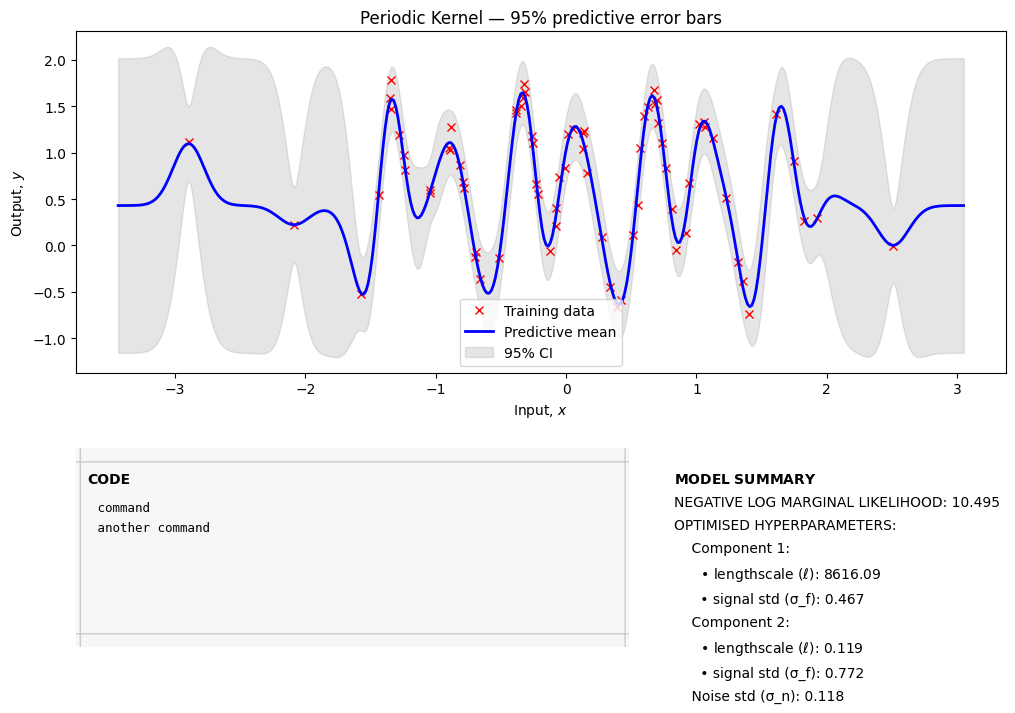

In [12]:
cw1utils.print_model_summary(m)
cw1utils.print_model_marginal_likelihood(m)
cw1utils.plot_predictive_error_bars(m, X, y, "\n command\n another command")

# cw1utils.plot_2d_predictive(mA, mB, codeA=None, codeB=None, save_path=None)
# cw1utils.plot_sampled_functions(X, F, code_snippet, n_draws=3, save_path=None)

# Now to the questions

# Question A

In [13]:
# loading the data

data = sio.loadmat("cw1a.mat")

X = np.asarray(data["x"], dtype=float)
y = np.asarray(data["y"], dtype=float)

#  Train a GP with a squared exponential covariance function, GPy.kern.RBF() and intialise the hyper parameters as described.

k = GPy.kern.RBF(input_dim=X.shape[1], lengthscale=np.exp(-1.0), variance=1.0)
m = GPy.models.GPRegression(X, y, k)

m.Gaussian_noise.variance = 1.0

In [14]:
m.optimize()

In [15]:
print(m)


Name : GP regression
Objective : 11.899004246684939
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |    0.8045956274095476  |      +ve      |        
  rbf.lengthscale          |   0.12822652660430478  |      +ve      |        
  Gaussian_noise.variance  |  0.013883389223900876  |      +ve      |        


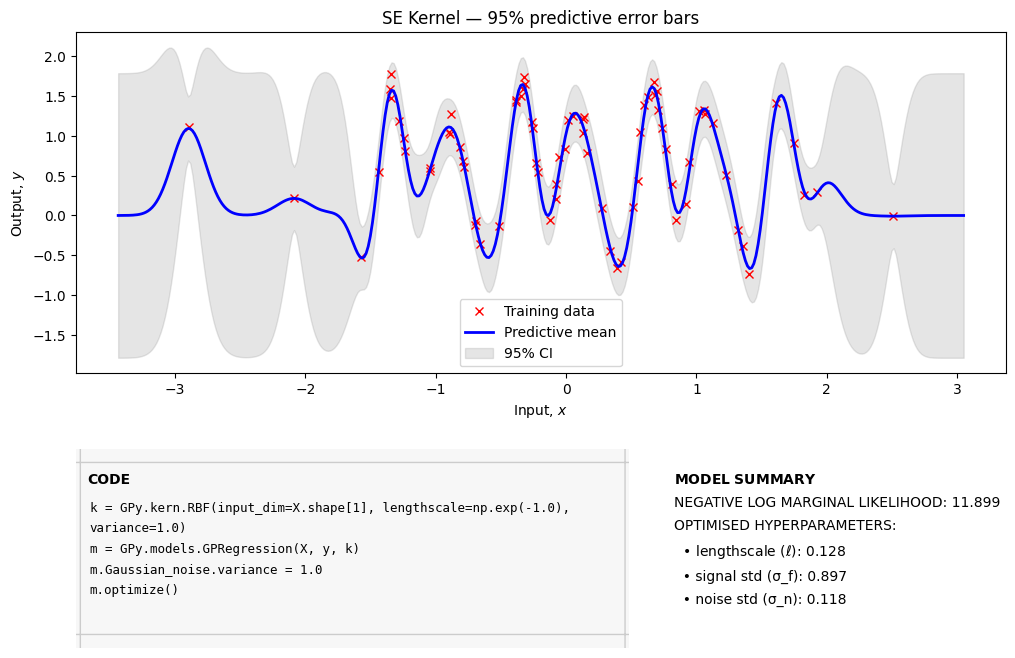

In [16]:
cw1utils.plot_predictive_error_bars(m, X, y, "\nk = GPy.kern.RBF(input_dim=X.shape[1], lengthscale=np.exp(-1.0), variance=1.0) \nm = GPy.models.GPRegression(X, y, k) \nm.Gaussian_noise.variance = 1.0 \nm.optimize() ")

## Some preliminary observations for this part a

## Analysing the optimised params:
---

- lengthscale: This is a very small value relative to the input range.
- The model now assumes points only a small distance apart are highly correlated. This allows the model to produce a highly oscillating or "wiggly" function that accurately tracks the rapid variations in the data.
- Low noise estimate: The model believes the data is relatively clean and the wiggles are true signal, not just noise. It therefore attempts to pass very closely to the majority of the data points.
- This value (variance $\sigma_f^2 \approx 0.805$) is close to the vertical range of the wiggles.Consequence: It confirms the magnitude of the smooth variations that the function makes.

- Narrow Bands Near Data (Interpolation): The shaded area is tightly constrained around the predictive mean (blue line) where the training data (red crosses) exists. This narrowness is due to the low noise estimate ($\sigma_n \approx 0.118$), showing high confidence in the function's value near observed points.
- The small optimized lengthscale ($\ell=0.128$) implies that the function must be highly wiggly. This is clearly demonstrated by the predictive error bars, which are extremely narrow directly around the data points (due to the low noise $\sigma_n$), but rapidly widen in any region devoid of data (e.g., $x \approx -2.5$ and $x>2.0$), because the model instantly loses correlation just a short distance away from the observations.
- Uncertainty Spikes in Extrapolation: In the regions far outside the data (e.g., $x>2.5$ or $x<-3.0$), the uncertainty quickly reaches the maximum level defined by the Signal Standard Deviation, confirming the model has no idea what happens far outside the training range.


## Mental Cheatsheet
- **Lengthscale (l)**: small value - wiggly fxn, quickly changing. High value - Smooth function, slow to change. low l is typically less than input range. high l is higher than input range.

- **Noise Variance ($\sigma_n^2$) (The Cleanliness Measure):** The Noise Variance is compared to the Signal Variance ($\sigma_f^2$) itself, as it defines the signal-to-noise ratio. Low $\sigma_n^2$ that is $\sigma_n^2 \ll \sigma_f^2$ means *the data is believed to be clean*. The model trusts the data points and tries to fit them tightly, resulting in narrow error bars at the data points. For $\sigma_n^2 \approx \sigma_f^2$ or $\sigma_n^2 > \sigma_f^2$, The data is believed to be noisy. The model is forced to smooth over the points, and the uncertainty remains high everywhere. *In summary, if low, data is clean; model fits points tightly. If high, data is noisy; model smooths over the points.*

- **Signal variance**: If it is low, function is flat. If it is high, function has large vertical swings.

# Question B


In [17]:
print(m)


Name : GP regression
Objective : 11.899004246684939
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |    0.8045956274095476  |      +ve      |        
  rbf.lengthscale          |   0.12822652660430478  |      +ve      |        
  Gaussian_noise.variance  |  0.013883389223900876  |      +ve      |        


In [18]:
m.optimize_restarts(num_restarts=20, verbose=True)

Optimization restart 1/20, f = 11.899004246678217
Optimization restart 2/20, f = 11.899004246619512
Optimization restart 3/20, f = 78.22018817439412
Optimization restart 4/20, f = 78.2201881731001
Optimization restart 5/20, f = 78.22018817477948
Optimization restart 6/20, f = 11.899004246587182
Optimization restart 7/20, f = 78.22018817299212
Optimization restart 8/20, f = 78.22018817438152
Optimization restart 9/20, f = 78.22018817321589
Optimization restart 10/20, f = 78.22018817299528
Optimization restart 11/20, f = 11.899004246780002
Optimization restart 12/20, f = 78.22018818602616
Optimization restart 13/20, f = 11.89900424658709
Optimization restart 14/20, f = 11.899004246624344
Optimization restart 15/20, f = 11.899004246587168
Optimization restart 16/20, f = 11.899004246587126
Optimization restart 17/20, f = 11.899004246593847
Optimization restart 18/20, f = 78.22018817758678
Optimization restart 19/20, f = 78.22018817298387
Optimization restart 20/20, f = 78.22018817297521


In [19]:
print(m)


Name : GP regression
Objective : 11.89900424658709
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  rbf.variance             |    0.8045925793284582  |      +ve      |        
  rbf.lengthscale          |   0.12822638626820684  |      +ve      |        
  Gaussian_noise.variance  |  0.013883404730257265  |      +ve      |        


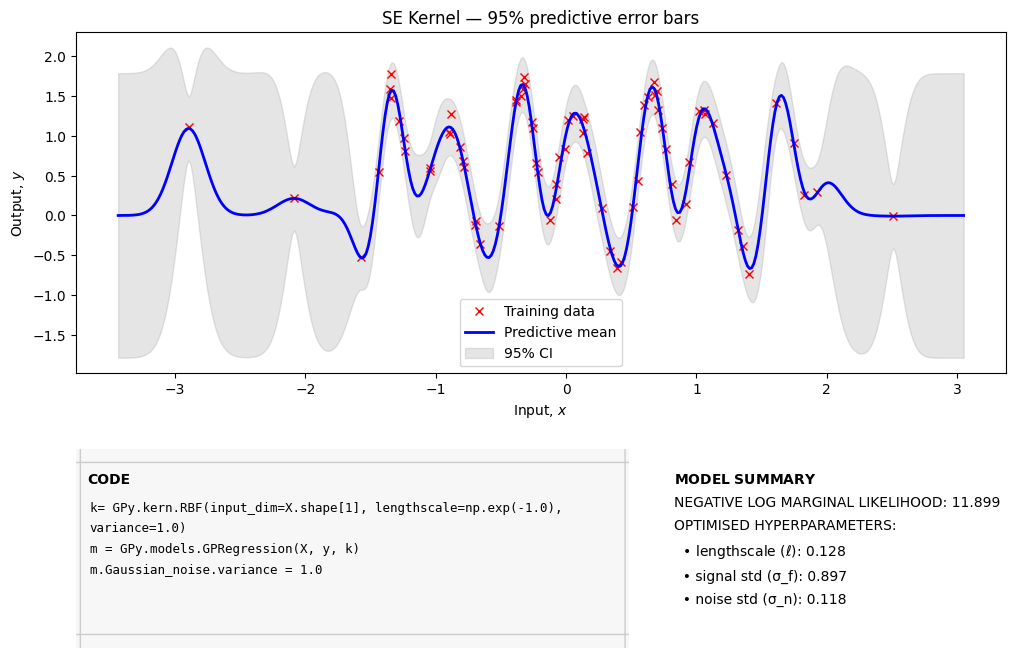

In [21]:
data = sio.loadmat("cw1a.mat")

X = np.asarray(data["x"], dtype=float)
y = np.asarray(data["y"], dtype=float)

#  Train a GP with a squared exponential covariance function, GPy.kern.RBF() and intialise the hyper parameters as described.

k = GPy.kern.RBF(input_dim=X.shape[1], lengthscale=np.exp(-1.0), variance=1.0)
m = GPy.models.GPRegression(X, y, k)

m.Gaussian_noise.variance = 1.0
m.optimize()
cw1utils.plot_predictive_error_bars(m, X, y, "\nk= GPy.kern.RBF(input_dim=X.shape[1], lengthscale=np.exp(-1.0), variance=1.0)\nm = GPy.models.GPRegression(X, y, k)\nm.Gaussian_noise.variance = 1.0")


--- Model B: Local Optimum ---

Name : GP regression
Objective : 78.22018817299701
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   0.4843418702065867  |      +ve      |        
  rbf.lengthscale          |     8.04193964876358  |      +ve      |        
  Gaussian_noise.variance  |  0.43966291862648554  |      +ve      |        


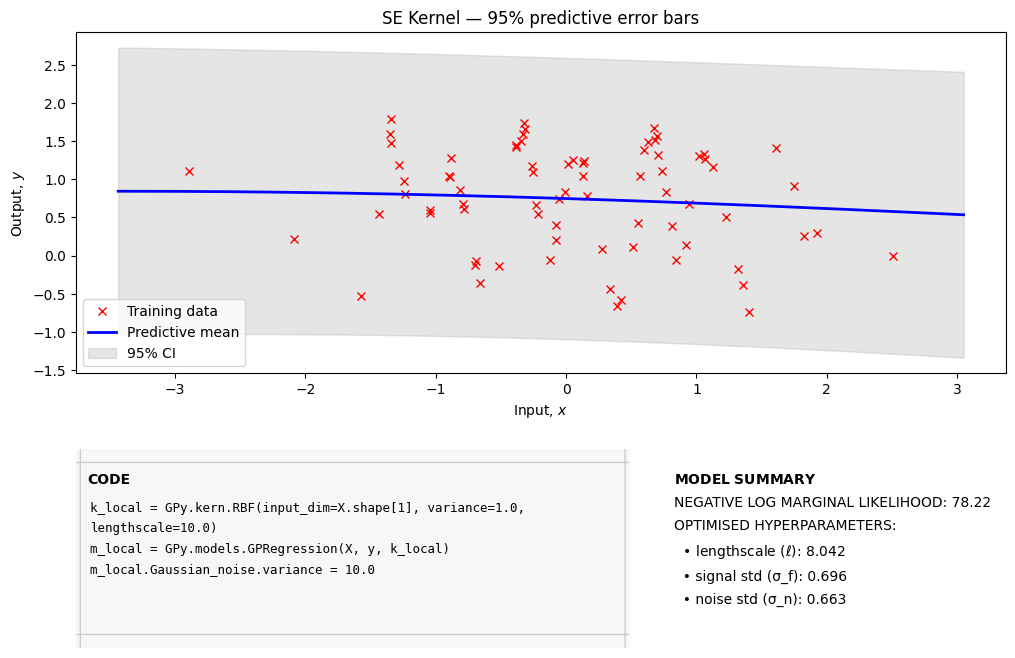

In [42]:
# Model B is the Local Optimum (NLML ≈ 78.220)

# 1. Define a NEW model (m_local) and initialize to the "smooth" basin
k_local = GPy.kern.RBF(input_dim=X.shape[1], variance=1.0, lengthscale=10.0)
m_local = GPy.models.GPRegression(X, y, k_local)
m_local.Gaussian_noise.variance = 10.0

m_local.optimize()

# 3. Print the final hyperparameters and NLML (Should show NLML ≈ 78.220)
print("\n--- Model B: Local Optimum ---")
print(m_local)

# 4. Plot the poor fit (Smooth/Noisy interpretation)
# This plot shows the flat mean function and wide, constant error bars.
cw1utils.plot_predictive_error_bars(m_local, X, y, "\nk_local = GPy.kern.RBF(input_dim=X.shape[1], variance=1.0, lengthscale=10.0)\nm_local = GPy.models.GPRegression(X, y, k_local)\nm_local.Gaussian_noise.variance = 10.0")

Potential answers
---

Multiple optimization restarts confirmed the existence of two distinct local optima. Specifically, when initializing the hyperparameters to find the Smooth/Noisy Optimum (Optimum B), we observed that the Negative Log Marginal Likelihood (NLML) consistently converged to $\mathbf{78.220}$, even with varied initial values for the kernel variance ($\sigma_f^2$) and noise variance ($\sigma_n^2$).

For 78.22: "This stability is due to the very large initial lengthscale ($\ell=10.0$) dominating the model's interpretation. A large lengthscale locks the model into the assumption that the underlying function is extremely smooth (i.e., almost flat). Once committed to this smooth structure, the optimization problem simplifies. The optimizer merely finds the optimal ratio between $\sigma_f^2$ and $\sigma_n^2$ necessary to account for the data scatter under that fixed, smooth assumption. This local minimum is a very wide and shallow valley in the NLML landscape, making it easy to find and highly stable, regardless of the initial variance settings."

For 11.899: In contrast, the Global Optimum (A), with $\text{NLML} \approx 11.899$, requires the lengthscale to be optimized to a very small value ($\ell \approx 0.128$). This optimal NLML region is much sharper and harder to find, which is why the initial configuration of $\ell=e^{-1}$ only sometimes lands there, leading to a much greater $\Delta \text{NLML}$ and high confidence in its superiority.

# Question C

In [22]:
k = GPy.kern.StdPeriodic(input_dim=X.shape[1], lengthscale=1, period=1.0, variance=1.0)
m = GPy.models.GPRegression(X, y, k)

In [23]:
m.optimize()

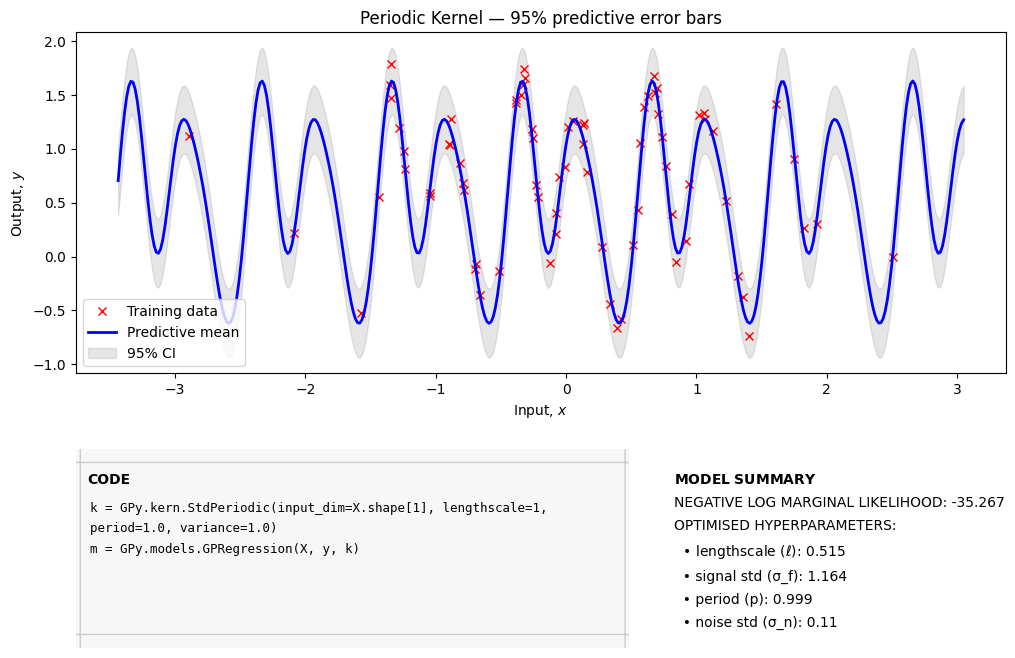

In [24]:
cw1utils.plot_predictive_error_bars(m, X, y, "\nk = GPy.kern.StdPeriodic(input_dim=X.shape[1], lengthscale=1, period=1.0, variance=1.0) \nm = GPy.models.GPRegression(X, y, k)")

## Potential answer
---

The evidence overwhelmingly supports the conclusion that the underlying data-generating function is strictly periodic in nature.

1. Quantitative Evidence (Model Selection): The most compelling evidence comes from the Negative Log Marginal Likelihood (NLML), which is the gold standard for model comparison:RBF (Smooth/Wiggly) NLML: $11.899$ Periodic NLML: $\mathbf{-35.267}$ The difference, $\Delta \text{NLML} \approx 47.166$, is a massive reduction. This tells us the periodic assumption provides a vastly superior and simpler explanation of the data's structure. If the data were only "quasi-periodic" (just generally wiggling), the flexible RBF kernel would likely have achieved a much closer NLML score. The fact that the strictly defined Periodic kernel wins so decisively proves the repeating pattern is highly regular.

2. Hyperparameter Evidence: The optimized hyperparameters confirm the strictness of the pattern:Clean Period ($p$): The model optimized the period to $\mathbf{0.999}$. This is almost mathematically equal to $1.0$, indicating the spacing of the wiggles is extremely regular and consistent across the entire input domain.Low Noise ($\sigma_n$): The final noise standard deviation of $\mathbf{0.110}$ means the model assumes very little error is left over after fitting the periodic function. The remaining error is attributed only to minor observation noise, not to failures in the periodic structure itself.

3. Qualitative Evidence (Error Bars): The behavior of the predictive error bars qualitatively validates the periodic assumption:The uncertainty band is narrow everywhere it is constrained by the fitted function.Crucially, in the extrapolation regions (e.g., $x>2.5$), the predictive mean continues the oscillation indefinitely, and the uncertainty remains low. This demonstrates the model's high confidence that the pattern repeats exactly into unobserved territory, which is the very definition of a strictly periodic function.

4. Conclusion: The combination of a highly regular optimized period ($p \approx 1.0$) and the overwhelming statistical preference for the Periodic model ($\text{NLML} = -35.267$) provides conclusive evidence that the data-generating mechanism, apart from noise, is strictly periodic.

# Question D

In [25]:
X_test = np.linspace(-5.0, 5.0, 200).reshape(-1, 1)
k_se = GPy.kern.RBF(input_dim=1, variance=1.0, lengthscale=np.exp(2.0))
k_per = GPy.kern.StdPeriodic(input_dim=1, variance=1.0, lengthscale=np.exp(-0.5), period=1.0)
kernel = k_per * k_se
# m = GPy.models.GPRegression(X, y, kernel)

m_sample = GPy.models.GPRegression(X_test, np.zeros_like(X_test), kernel)
m_sample.Gaussian_noise.variance.fix(1e-6)

array([0])

In [26]:
m_sample.optimize()

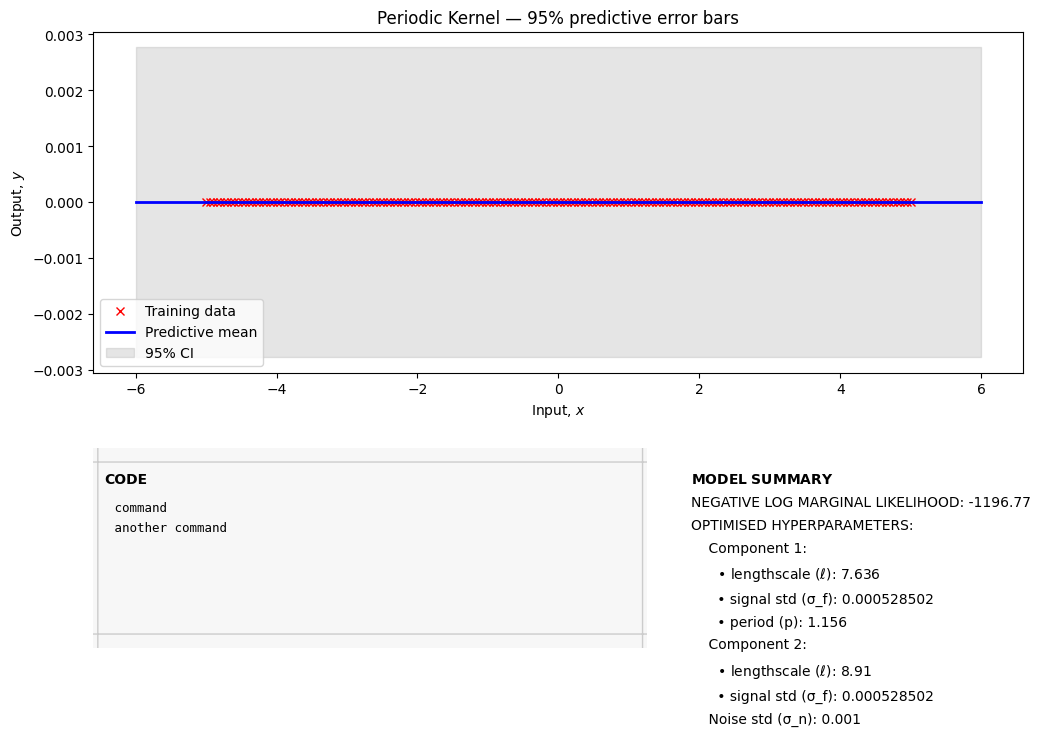

In [27]:
cw1utils.plot_predictive_error_bars(m_sample, X_test, np.zeros_like(X_test), "\n command\n another command")

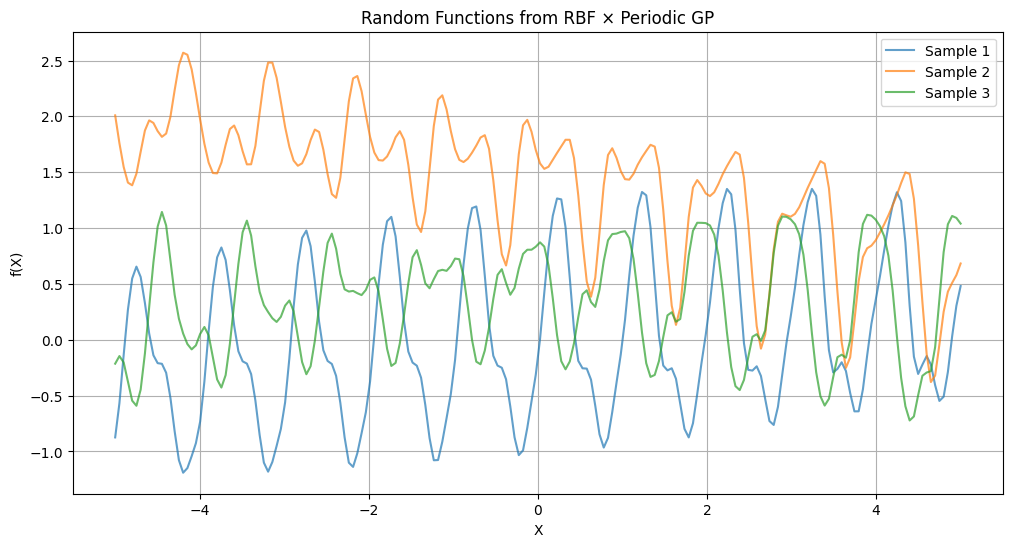

In [28]:
import matplotlib.pyplot as plt

# Define X
X = np.linspace(-5.0, 5.0, 200, dtype=np.float64).reshape(-1, 1)

# Create product kernel: RBF * Periodic
kern_rbf = GPy.kern.RBF(input_dim=1, lengthscale=np.exp(2), variance=1.0)
kern_periodic = GPy.kern.StdPeriodic(input_dim=1, lengthscale=np.exp(-0.5),
                                      period=1.0, variance=1.0)
kern_product = kern_rbf * kern_periodic

# Compute covariance matrix
K = kern_product.K(X,X)

# Add small jitter for numerical stability
jitter = 1e-6 * np.eye(200)
K_stable = K + jitter

# Cholesky decomposition
L = np.linalg.cholesky(K_stable)

# Generate random samples
n_samples = 3
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    u = np.random.randn(200, 1)
    f_sample = L @ u
    plt.plot(X, f_sample, alpha=0.7, label=f'Sample {i+1}')

plt.xlabel('X')
plt.ylabel('f(X)')
plt.title('Random Functions from RBF × Periodic GP')
plt.legend()
plt.grid(True)
plt.show()

# Question E

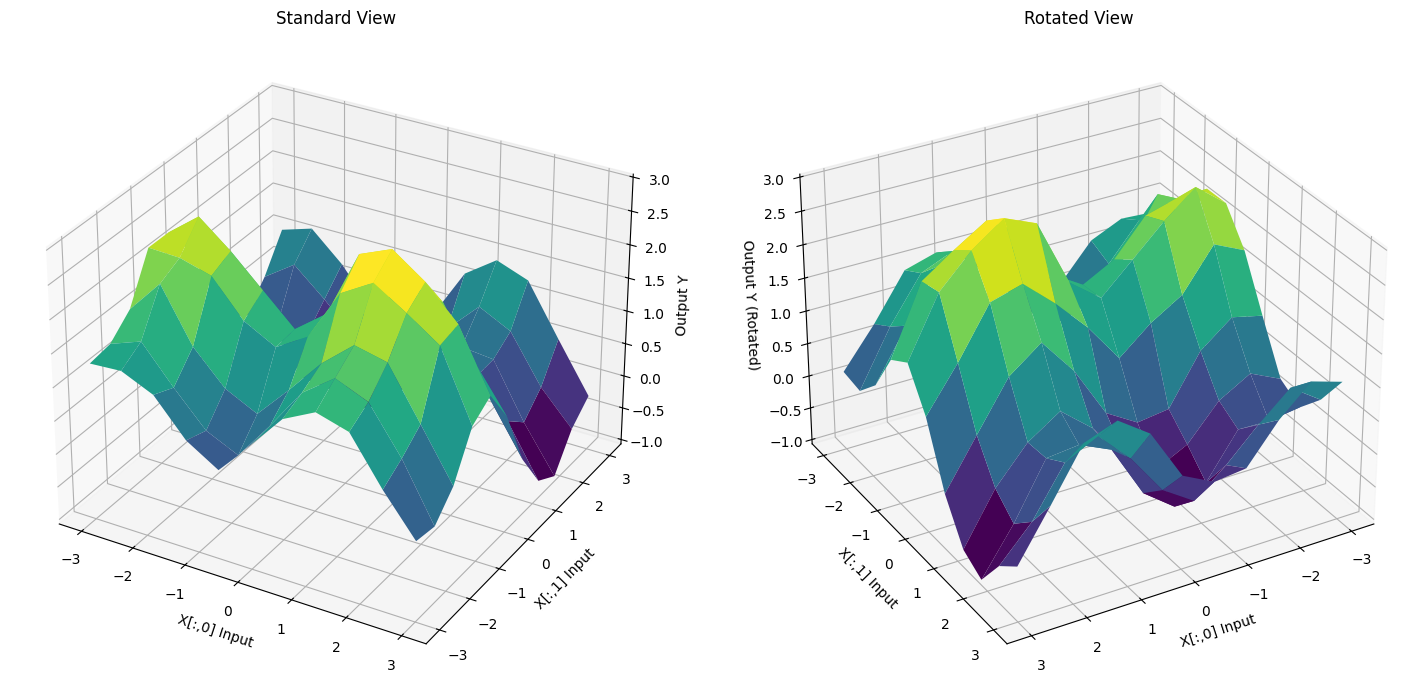

In [29]:
data = sio.loadmat("cw1e.mat")
# Note: Check the actual keys in the .mat file. Assuming 'x' and 'y' based on common practice.
X = np.asarray(data["x"], dtype=float)
Y = np.asarray(data["y"], dtype=float)

# Reshape 1D arrays into 11x11 grids for the plot_surface function
X1_grid = X[:,0].reshape(11, 11)
X2_grid = X[:,1].reshape(11, 11)
Y_surface = Y.reshape(11, 11)

# --- Create 3D Plots Side-by-Side ---
fig = plt.figure(figsize=(15, 7)) # Increase size to fit two plots horizontally

# Plot 1: Standard View (Position 1 of 2)
ax1 = fig.add_subplot(1, 2, 1, projection='3d') # Corrected: 1 row, 2 columns, plot 1
ax1.plot_surface(X1_grid, X2_grid, Y_surface, cmap='viridis')
ax1.set_xlabel('X[:,0] Input')
ax1.set_ylabel('X[:,1] Input')
ax1.set_zlabel('Output Y')
ax1.set_title('Standard View')

# Plot 2: Rotated View (Position 2 of 2)
ax2 = fig.add_subplot(1, 2, 2, projection='3d') # Corrected: 1 row, 2 columns, plot 2
ax2.plot_surface(X1_grid, X2_grid, Y_surface, cmap='viridis')

# Use ax.view_init() to rotate the view (e.g., elevation 30 degrees, azimuth 60 degrees)
# This fulfills the requirement to "Rotate the data, to get a feel for it."
ax2.view_init(elev=30, azim=60)

ax2.set_xlabel('X[:,0] Input')
ax2.set_ylabel('X[:,1] Input')
ax2.set_zlabel('Output Y (Rotated)')
ax2.set_title('Rotated View')

plt.tight_layout() # Adjusts spacing between subplots
plt.show()

In [30]:
# Model A: Single ARD RBF
k_A = GPy.kern.RBF(input_dim=2, ARD=True) # ARD=True gives two lengthscales
m_A = GPy.models.GPRegression(X, Y, k_A)
m_A.optimize_restarts(num_restarts=10)
NLML_A = m_A.log_likelihood() * -1

# Model B: Sum of two ARD RBF Kernels
# Break symmetry with random initial values (as suggested)
rands = 0.1 * np.random.randn(6) # Random initial values for 2 variances and 4 lengthscales

k1 = GPy.kern.RBF(input_dim=2, ARD=True, variance=rands[0]**2, lengthscale=np.exp(rands[1:3]))
k2 = GPy.kern.RBF(input_dim=2, ARD=True, variance=rands[3]**2, lengthscale=np.exp(rands[4:6]))
k_B = k1 + k2

m_B = GPy.models.GPRegression(X, Y, k_B)
m_B.optimize_restarts(num_restarts=10)
NLML_B = m_B.log_likelihood() * -1

Optimization restart 1/10, f = -19.218748536187633
Optimization restart 2/10, f = -19.218748536190873
Optimization restart 3/10, f = -19.21874853620077
Optimization restart 4/10, f = -19.218748536202966
Optimization restart 5/10, f = -19.21874853620166
Optimization restart 6/10, f = -19.218748535522977
Optimization restart 7/10, f = -19.218748536202575
Optimization restart 8/10, f = -19.218748536147608
Optimization restart 9/10, f = -19.2187485359185
Optimization restart 10/10, f = -19.218748536176626


 /usr/local/lib/python3.12/dist-packages/GPy/kern/src/stationary.py:137: RuntimeWarning:overflow encountered in square
 /usr/local/lib/python3.12/dist-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /usr/local/lib/python3.12/dist-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in divide
 /usr/local/lib/python3.12/dist-packages/GPy/kern/src/rbf.py:178: RuntimeWarning:invalid value encountered in multiply


Optimization restart 1/10, f = -66.4082410092128
Optimization restart 2/10, f = -66.4082509527108
Optimization restart 3/10, f = -66.40825163184759
Optimization restart 4/10, f = -66.40825144076885
Optimization restart 5/10, f = -66.4082510269046
Optimization restart 6/10, f = -66.40825096452022
Optimization restart 7/10, f = -66.40824912199261
Optimization restart 8/10, f = -66.40825136820598
Optimization restart 9/10, f = -66.40825030583784
Optimization restart 10/10, f = -19.218748476684162
